# Rat LPS VAMPIRE Analysis

Created: 2022-05-19

Edited: 2022-10-04

Objetive: Perform VAMPIRE analysis on the rat LPS model.

## Baseline data setup

### Baseline VAMPIRE analysis

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold
vp.plot.set_plot_style()

In [2]:
img_set_path = r'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/2-thresholded-data-tif'
output_path = r'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/4-vampire-analysis-data'

In [3]:
# extract properties from all images for future use
vp.extraction.extract_properties(img_set_path)

,filename,image_id,label,centroid-y,centroid-x,area,bbox_area,convex_area,filled_area,perimeter,...,major_axis_length,minor_axis_length,orientation,euler_number,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio
0,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,1,84.900000,1302.300000,280,525,373,280,104.947222,...,23.755456,17.647939,-0.568452,1,0.669402,0.750670,0.533333,"[[8, 9, 10, 9, 9, 9, 10, 11, 12, 13, 14, 15, 1...",0.319467,1.346075
1,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,2,94.152113,159.977465,355,594,500,355,134.260931,...,26.411298,21.062019,0.099189,1,0.603369,0.710000,0.597643,"[[10, 11, 12, 13, 12, 13, 12, 11, 10, 11, 12, ...",0.247479,1.253977
2,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,3,140.586331,1296.607914,278,684,402,278,96.976659,...,35.258418,12.241819,-0.315808,1,0.937790,0.691542,0.406433,"[[15, 16, 17, 16, 16, 16, 16, 15, 16, 16, 15, ...",0.371467,2.880162
3,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,4,129.236842,1231.164474,152,360,246,152,80.876154,...,26.786402,11.424830,1.288244,1,0.904480,0.617886,0.422222,"[[5, 6, 7, 8, 7, 8, 9, 10, 11, 12, 13, 14, 14,...",0.292020,2.344578
4,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,5,191.035496,1284.299878,817,1666,1188,817,172.823376,...,43.710630,28.713930,-0.197205,1,0.753969,0.687710,0.490396,"[[22, 23, 23, 23, 22, 23, 24, 25, 26, 27, 28, ...",0.343738,1.522280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2019-02-18_DAPI_Iba_LPS_1ug_0-24_24h_60x_scan_...,32,71,1386.167702,1364.273292,161,360,278,161,79.734019,...,19.206076,14.482919,0.430881,1,0.656782,0.579137,0.447222,"[[3, 4, 5, 6, 5, 5, 6, 7, 8, 9, 10, 10, 10, 10...",0.318235,1.326119
1056,2019-02-18_DAPI_Iba_LPS_1ug_0-24_24h_60x_scan_...,32,72,1408.429952,658.439614,207,418,281,207,81.355339,...,20.514445,15.235555,-1.226831,1,0.669653,0.736655,0.495215,"[[6, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14...",0.393014,1.346485
1057,2019-02-18_DAPI_Iba_LPS_1ug_0-24_24h_60x_scan_...,32,73,1444.747500,135.615000,800,1178,853,800,115.053824,...,35.031153,29.270917,-1.296825,1,0.549387,0.937866,0.679117,"[[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...",0.759447,1.196790
1058,2019-02-25_NT_24h_60x_scan_2_otsu_thresh.tif,33,1,289.716535,1183.429134,254,663,493,254,140.089358,...,38.137659,13.946871,-1.541077,1,0.930734,0.515213,0.383107,"[[6, 7, 7, 6, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13...",0.162642,2.734496


Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/2-thresholded-data-tif
Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/2-thresholded-data-tif


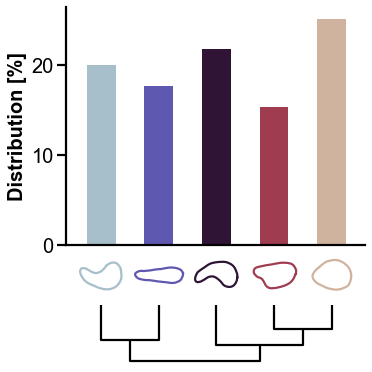

In [4]:
build_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'output_path': [output_path],
        'model_name': ['rat-lps'],
        'num_points': [np.nan],
        'num_clusters': [5],
        'num_pc': [np.nan],
    })
vp.quickstart.build_models(build_info_df, random_state=1)

In [6]:
model_path = os.path.join(output_path, 'model_rat-lps_(50_5_30)__.pickle')
vampire_model = vp.util.read_pickle(model_path)

Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/2-thresholded-data-tif
Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-lps/2-thresholded-data-tif


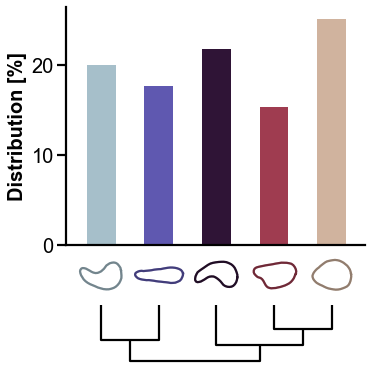

In [7]:
apply_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'model_path': [model_path],
        'output_path': [output_path],
        'img_set_name': ['rat-lps'],
    })
vp.quickstart.apply_models(apply_info_df)

In [8]:
property_path = os.path.join(output_path, 'apply-properties_rat-lps_on_rat-lps_(50_5_30)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)